## 多层感知机

### 隐藏层

### 激活函数

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

### ReLU函数

In [4]:
# x.detach()是把x从计算图中分离出来，不参与梯度的计算
# requires_grad=True用于指定需要对该张量进行梯度计算

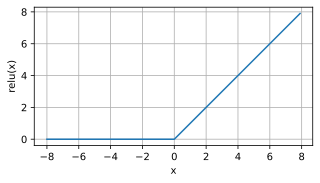

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=((5, 2.5)))

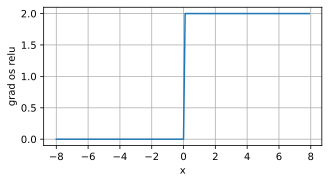

In [6]:
# ReLU函数的导数
y.backward(torch.ones_like(x), retain_graph=True)
# torch.ones_like(x)用于创造一个与x形状相同的值都为1的张量
# 把它放在y.backward()中，指定用于计算梯度的初始梯度值，用初始值×算的的梯度值
# retain_graph=True保留计算图
d2l.plot(x.detach(), x.grad, 'x', 'grad os relu', figsize=((5, 2.5)))

### sigmoid函数

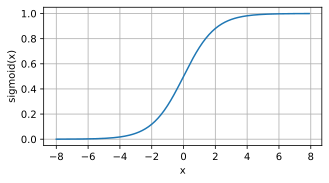

In [9]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=((5, 2.5)))

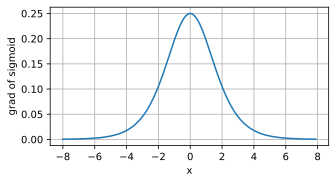

In [10]:
# sigmoid导数
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=((5, 2.5)))

### tanh函数

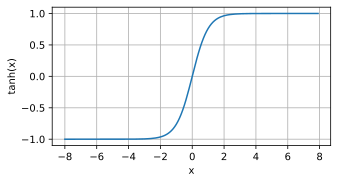

In [11]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=((5, 2.5)))

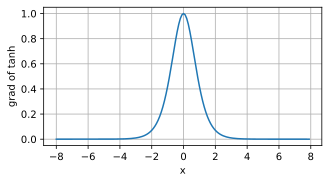

In [13]:
# tanh导数
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=((5, 2.5)))

## 多层感知机的从零开始实现

In [14]:
import torch
from torch import nn
from d2l import torch as d2l

In [15]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### 初始化模型参数

In [16]:
# 在这个多层感知机中我们只设置一个隐藏层，256

In [18]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))

W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

### 激活函数

In [19]:
# 实现ReLU函数
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

### 模型

In [20]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里@代表矩阵乘法
    return (H@W2 + b2)

### 损失函数

In [21]:
loss = nn.CrossEntropyLoss(reduction='none')

### 训练

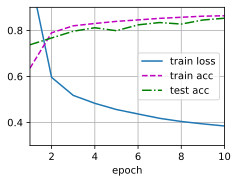

In [22]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

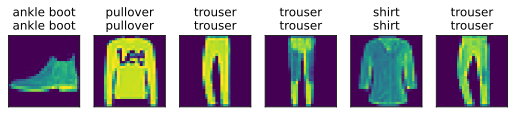

In [23]:
d2l.predict_ch3(net, test_iter)

In [25]:
d2l.train_epoch_ch3??

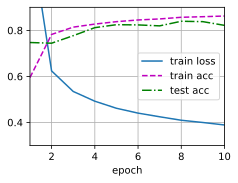

In [28]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 128

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens1, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens1, requires_grad=True))

W2 = nn.Parameter(torch.randn(
    num_hiddens1, num_hiddens2, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_hiddens2, requires_grad=True))

W3 = nn.Parameter(torch.randn(
    num_hiddens2, num_outputs, requires_grad=True) * 0.01)
b3 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2, W3, b3]

num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

描述为什么涉及多个超参数更具挑战性？
1，参数空间的维度增加：每个超参数都代表了一个参数空间中的一个维度。当超参数数量增加时，参数空间的维度也随之增加，使得问题更加复杂。在高维空间中搜索最优解变得更加困难，因为超参数之间可能存在相互依赖和交互作用，影响模型性能。
2，参数之间的相互影响：多个超参数之间通常存在相互依赖和影响。调整一个参数可能会导致其他参数的最优值发生变化。这样的相互作用增加了最优超参数组合的难度。找到一个全局最优解需要在多维度空间中进行探索，这对于优化算法来说是一项具有挑战性的任务。
3，计算资源的需求增加：在多个超参数的情况下，需要尝试更多的组合和配置，以找到最佳的超参数组合。这将导致更多的计算资源需求，例如更长的训练时间和更多的计算成本。
4，交互效应的复杂性：多个超参数可能会有复杂的交互效应，这意味着它们在一起的组合可能导致非线性的影响。这种非线性关系使得问题更加复杂，并且通常需要更多的实验来找到最佳组合。
5，过拟合和泛化问题：在多个超参数的调整过程中，存在过拟合的风险，即优化得到的参数在训练集上表现很好，但在未知数据上表现较差，确保找到的超参数组合具有较好的泛化性能是一项挑战。
解决方法：
1，使用合适的优化算法：选择适合高维空间搜索的优化算法，如随机搜索，网格搜索，贝叶斯优化等
2，交叉验证：使用交叉验证来评估不同超参数组合的性能，帮助避免过拟合，并提供更可靠的评估指标。
3，自动调参：考虑使用自动调参工具或库，以减少手动调整超参数的工作量。自动调参工具可以更高效地在参数空间中搜索最优解。
4，特征选择和降维：在参数空间较大的情况下，可以考虑使用特征选择或降维技术来减少超参数的数量，从而降低问题的复杂性。
5，并行计算：利用并行计算资源，例如多个GPU或分布式计算，可以加速超参数搜索的过程。

## 多层感知机的简洁实现

In [1]:
# 本节通过高级API更简洁地实现多层感知机

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

### 模型

In [9]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

In [10]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

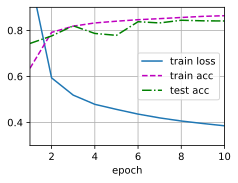

In [11]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 模型选择、欠拟合和过拟合

作为机器学习科学家，我们地目标是发现模式（pattern）。但是，我们如何才能确定模型是真正发现了一种泛化的模式，而不是简单地记住了数据呢？例如，我们想要在患者的基因数据与痴呆状态之间寻找模式，其中标签是从集合{痴呆、轻度认知障碍、健康}中提取的。因为基因可以唯一确定每个个体（不考虑双胞胎），所以在这个任务中是有可能记住整个数据集的。

我们不想让模型只会做这样的事情：“那是鲍勃！我记得他！他有痴呆症！”。原因很简单：当我们将来部署该模型时，模型需要判断从未见过的患者。只有当模型真正发现了一种泛化模式时，才会作出有效的预测。

更正式地说，我们的目标是发现某些模式，这些模式捕获到了我们训练集潜在总体的规律。如果成功做到了这点，即使是对以前从未遇到过的个体，模型也可以成功地评估风险。如何发现可以泛化的模式是机器学习的根本问题。

困难在于，当我们训练模型时，我们只能访问数据中的小部分样本。最大的公开图像数据集包含大约一百万张图像。而大部分时候，我们只能从数千或数万个数据样本中学习。在大型医院系统中，我们可能访问数十万份医疗记录。当我们使用有限的样本时，可能会遇到这样的问题：当收集到更多的数据时，会发现之前找到的明显关系并不成立。

将模型在训练数据上拟合的比在潜在分布中更接近的现象称为过拟合，用于对抗过拟合的技术称为正则化（regularization）。在前面的章节中，有些读者可能在用Fashion-MNIST数据集做过实验时已经观察到了这种过拟合现象。在实验中调整模型架构或超参数时会发现：如果有足够多的神经元，层数和训练迭代周期，模型最终可以在训练集上达到完美的精度，此时测试集的准确性却下降了。

### 训练误差和泛化误差

为了进一步讨论这一现象，我们需要了解训练误差和泛化误差。训练误差（training error）是指，模型在训练数据集上计算得到的误差。泛化误差（generalization error）是指，模型应用在同样从原始样本的分布中抽取的无线多数据样本时，模型误差的期望

问题是，我们永远不能准确地计算出泛化误差。这是因为无限多的数据样本是一个虚构的对象。在实际中，我们只能通过将模型应用于一个独立的测试集来评估泛化误差，该测试集由随机选取的，未曾在训练集中出现的数据样本构成。

下面三个思维实验将有助于更好地说明这种情况。
假设一个大学生正在努力准备期末考试。一个勤奋的学生会努力做好练习，并利用往年的考试题目来测试自己的能力。尽管如此，在过去的考试题目上取的好成绩并不能保证他会在真正考试时发挥出色。例如，学生可能试图通过死记硬背考题的答案来做准备。他甚至可以完全记住过去考试的答案。另一名学生可能会通过试图理解给出某些答案的原因来做准备。在大多数情况下，后者会考的更好。

类似地，考虑一个简单地使用查表法来回答问题的模型。如果允许的输入集合是离散的并且相当小，那么也许在查看许多训练样本后，该方法将执行的很好。但当这个模型面对从未见多的例子时，它表现的可能比随机猜测好不到哪去。这是因为输入空间太大了，远远不可能记住每一个可能的输入所对应的答案。例如，考虑28×28的灰度图像。如果每个像素可以取256个灰度值中的一个，则有256**784个可能的图像。这意味着指甲大小的低分辨率灰度图像的数量比宇宙中的原子要多得多。即使我们可能遇到这样的数据，我们也不能存储整个查找表。

最后，考虑对掷硬币的结果（类别0：正面，类别1：反面）进行分类的问题。假设硬币是公平的，无论我们相出什么算法，泛化始终是1/2，然而，对于大多数算法，我们应该期望训练误差会更低（取决于运气）。考虑数据集{0，1，1，1，0，1}。我们的算法不需要额外的特征，将倾向于总是预测多数类，从我们有限的样本来看，它似乎是1占主流。在这种情况下，总是预测类1的模型将产生1/3的误差，这笔我们的泛化误差要好得多。当我们逐渐增加数据量，正面比例明显偏离1/2的可能性将会降低，我们的训练误差将与泛化误差相匹配。

### 统计学理论

由于泛化是机器学习中的基本问题，许多数学家和理论家毕生致力于研究描述 这一现象的形式理论。
我们假设训练数据都是从相同的分布中独立提取的。这通常被称为独立同分布假设，这意味着对数据进行采样的过程没有进行“记忆”。换句话说，抽取的第2个样本和第3个样本的相关性，并不比抽取的第2个样本和第200万个样本的相关性强。

要成为一名优秀的机器学习科学家需要具备批判思考能力。假设是存在漏洞的，即很容易找出假设失效的情况。如果我们根据从加州大学旧金山分校医学中心的患者数据训练死亡风险预测模型，并将其应用于马萨诸塞州综合医院的患者数据，结果会怎样？这两个数据的分布可能不完全一样。此外，抽样过程可能与时间相关。比如当我们对微博的主体进行分类时，新闻周期会使得正在讨论的话题产生时间依赖性，从而违反独立性假设。

有时候我们即使轻微违背独立同分布假设，模型仍将继续运行得非常好。比如，我们有许多有用得工具已经应用于现实，如人脸识别、语音识别和语言翻译。毕竟，几乎所有现实的应用都至少涉及一些违背独立同分布假设的情况。

有些违背独立同分布假设的行为肯定会带来麻烦。比如，我们试图只用来自大学生的人脸数据来训练一个人脸识别系统，然后想要用它来监测疗养院中的老人。这不太可能有效，因为大学生看起来往往与老年人有很大的不同。

在接下来的章节中，我们将讨论因违背独立同分布假设而引起的问题。目前，即使认为独立同分布假设是理所当然的，理解泛化性也是一个困难的问题。此外，能够解释深层神经网络泛化性能的理论基础，也仍在继续困扰着学习理论领域最伟大的学者们。

当我们训练模型时，我们试图找到一个能够尽可能拟合训练数据的函数。但是如果它执行的“太好了”，而不能对看不见的数据做到很好的泛化，就会导致过拟合。这种情况正是我们想要避免或控制的。深度学习中有许多启发式的技术旨在防止过拟合。

### 模型复杂性

当我们有简单的模型和大量的数据时，我们期望泛化误差与训练误差相近。当我们有更复杂的模型和更少的样本时，我们预计训练误差会下降，但泛化误差会增大。模型复杂性由什么构成是一个复杂的问题。一个模型是否能很好地泛化取决于很多因素。例如，具有更多参数的模型可能被认为更复杂，参数有更大取值范围的模型可能更为复杂。通常对于神经网络，我们认为需要更多训练迭代的模型比较复杂，而需要早停（early stopping）的模型（即较少的训练迭代周期）就不那么复杂。

我们很难比较本质上不同大类的模型之间（例如，决策树与神经网络）的复杂性。就目前而言，一条简单的经验法则相当有用：统计学家认为，能够轻松解释任意事实的模型是复杂的，而表达能力有限但仍能很好地解释数据的模型可能更有现实用途。在哲学上，这与波普尔的科学理论的可证伪性标准密切相关：如果一个理论能拟合数据，且有具体的测试可以用来证明它是错误的，那么它就是好的。这一点很重要，因为所有的统计估计都是事后归纳。也就是说，我们在观察事实之后进行估计，因此容易受到相关谬误的影响。目前，我们将把哲学放在一边，坚持更切实的问题。

几个倾向于影响模型泛化的因素：
1，可调整参数的数量。当可调整参数的数量（有时称为自由度）很大时，模型往往更容易过拟合。
2，参数采用的值。当权重的取值范围较大时，模型可能更容易过拟合。
3，训练样本的数量。即使模型很简单，也很容易过拟合只包含一两个样本的数据集。而过拟合一个有数百万个样本的数据集则需要一个极其灵活的模型。

### 模型选择

In [1]:
# 在机器学习中，我们通常在评估几个候选模型后选择最终的模型。这个过程叫做模型的选择。
# 有时，需要进行比较的模型在本质上是完全不同的（比如，决策树与线性模型）。又有时
# 我们需要比较不同的超参数设置下的同一类模型。
# 例如，训练多层感知机模型时，我们可能希望⽐较具有不同数量的隐藏层、不同数量的隐藏单元以及不同的
# 激活函数组合的模型。为了确定候选模型中的最佳模型，我们通常会使⽤验证集。

In [2]:
# 验证集
# 原则上，在我们确定所有的超参数之前，我们不希望⽤到测试集。如果我们在模型选择过程中使⽤测试数据，
# 可能会有过拟合测试数据的⻛险，那就⿇烦⼤了。如果我们过拟合了训练数据，还可以在测试数据上的评估
# 来判断过拟合。但是如果我们过拟合了测试数据，我们⼜该怎么知道呢？
# 因此，我们决不能依靠测试数据进⾏模型选择。然⽽，我们也不能仅仅依靠训练数据来选择模型，因为我们
# ⽆法估计训练数据的泛化误差。
# 在实际应⽤中，情况变得更加复杂。虽然理想情况下我们只会使⽤测试数据⼀次，以评估最好的模型或⽐较
# ⼀些模型效果，但现实是测试数据很少在使⽤⼀次后被丢弃。我们很少能有充⾜的数据来对每⼀轮实验采⽤
# 全新测试集。
# 解决此问题的常⻅做法是将我们的数据分成三份，除了训练和测试数据集之外，还增加⼀个验证数据集
# （validation dataset），也叫验证集（validation set）。但现实是验证数据和测试数据之间的边界模糊得令
# ⼈担忧。除⾮另有明确说明，否则在这本书的实验中，我们实际上是在使⽤应该被正确地称为训练数据和验
# 证数据的数据集，并没有真正的测试数据集。因此，书中每次实验报告的准确度都是验证集准确度，⽽不是
# 测试集准确度。

In [3]:
# K折交叉验证
# 当训练数据稀缺时，我们甚⾄可能⽆法提供⾜够的数据来构成⼀个合适的验证集。这个问题的⼀个流⾏的解
# 决⽅案是采⽤K折交叉验证。这⾥，原始训练数据被分成K个不重叠的⼦集。然后执⾏K次模型训练和验证，
# 每次在K − 1个⼦集上进⾏训练，并在剩余的⼀个⼦集（在该轮中没有⽤于训练的⼦集）上进⾏验证。最后，
# 通过对K次实验的结果取平均来估计训练和验证误差。

### 欠拟合还是过拟合

In [4]:
# 当我们⽐较训练和验证误差时，我们要注意两种常⻅的情况。⾸先，我们要注意这样的情况：训练误差和验
# 证误差都很严重，但它们之间仅有⼀点差距。如果模型不能降低训练误差，这可能意味着模型过于简单（即
# 表达能⼒不⾜），⽆法捕获试图学习的模式。此外，由于我们的训练和验证误差之间的泛化误差很⼩，我们有
# 理由相信可以⽤⼀个更复杂的模型降低训练误差。这种现象被称为⽋拟合（underfitting）。
# 另⼀⽅⾯，当我们的训练误差明显低于验证误差时要⼩⼼，这表明严重的过拟合（overfitting）。注意，过拟
# 合并不总是⼀件坏事。特别是在深度学习领域，众所周知，最好的预测模型在训练数据上的表现往往⽐在保
# 留（验证）数据上好得多。最终，我们通常更关⼼验证误差，⽽不是训练误差和验证误差之间的差距。
# 是否过拟合或⽋拟合可能取决于模型复杂性和可⽤训练数据集的⼤⼩，这两个点将在下⾯进⾏讨论。

In [5]:
# 模型复杂性
# ⾼阶多项式函数⽐低阶多项式函数复杂得多。⾼阶多项式的参数较多，模型函数的选择范围较⼴。因此在固
# 定训练数据集的情况下，⾼阶多项式函数相对于低阶多项式的训练误差应该始终更低（最坏也是相等）。事
# 实上，当数据样本包含了x的不同值时，函数阶数等于数据样本数量的多项式函数可以完美拟合训练集

In [6]:
# 数据集大小
# 另⼀个重要因素是数据集的⼤⼩。训练数据集中的样本越少，我们就越有可能（且更严重地）过拟合。随着
# 训练数据量的增加，泛化误差通常会减⼩。此外，⼀般来说，更多的数据不会有什么坏处。对于固定的任务
# 和数据分布，模型复杂性和数据集⼤⼩之间通常存在关系。给出更多的数据，我们可能会尝试拟合⼀个更复
# 杂的模型。能够拟合更复杂的模型可能是有益的。如果没有⾜够的数据，简单的模型可能更有⽤。对于许多
# 任务，深度学习只有在有数千个训练样本时才优于线性模型。从⼀定程度上来说，深度学习⽬前的⽣机要归
# 功于廉价存储、互联设备以及数字化经济带来的海量数据集。

### 多项式回归

In [7]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [8]:
# 生成数据集
# 拟合三阶多项式y = 5 + 1.2x − 3.4 x2/2!+ 5.6 x3/3!+ ϵ where ϵ ∼ N(0,0.1 2 ).
# 噪声项ϵ服从均值为0且标准差为0.1的正态分布。在优化的过程中，我们通常希望避免⾮常⼤的梯度值或损失
# 值。这就是我们将特征从x i 调整为 xi/i! 的原因，这样可以避免很⼤的i带来的特别⼤的指数值。我们将为训练集
# 和测试集各⽣成100个样本。

In [9]:
max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100 # 训练和测试数据集大小
true_w = np.zeros(max_degree) # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i+1)  # gamma(n) = (n-1)!



In [10]:
poly_features.shape

(200, 20)

In [12]:
# labels的维度:(n_train+n_test, )
labels = np.dot(poly_features, true_w)

In [13]:
labels.shape

(200,)

In [16]:
# Numpy ndarray转换为tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype=torch.float32)
                                          for x in [true_w, features, poly_features, labels]]

In [17]:
features[:2], poly_features[:2, :], labels[:2]

(tensor([[ 1.5276],
         [-0.7416]]),
 tensor([[ 1.0000e+00,  1.5276e+00,  1.1668e+00,  5.9411e-01,  2.2689e-01,
           6.9318e-02,  1.7648e-02,  3.8513e-03,  7.3541e-04,  1.2482e-04,
           1.9068e-05,  2.6479e-06,  3.3708e-07,  3.9609e-08,  4.3219e-09,
           4.4014e-10,  4.2022e-11,  3.7760e-12,  3.2045e-13,  2.5764e-14],
         [ 1.0000e+00, -7.4156e-01,  2.7496e-01, -6.7967e-02,  1.2600e-02,
          -1.8688e-03,  2.3097e-04, -2.4469e-05,  2.2681e-06, -1.8689e-07,
           1.3859e-08, -9.3429e-10,  5.7736e-11, -3.2935e-12,  1.7445e-13,
          -8.6245e-15,  3.9973e-16, -1.7437e-17,  7.1835e-19, -2.8037e-20]]),
 tensor([6.1931, 2.7947]))

### 对模型进行训练和测试

In [18]:
# 首先我们实现一个函数来评估模型在给定数据集上的损失
# d2l.evaluate_loss()
def evaluate_loss(net, data_iter, loss):
    """评估给定数据集上模型的损失"""
    metric = d2l.Accumulator(2)  # 损失的总和， 样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [23]:
# 定义训练函数
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

In [24]:
# reshape(-1, 1)转换为列向量
# net.parameters()获取神经网络可学习的参数

In [39]:
nn.MSELoss?

### 三项多项式函数拟合（正常）

weight: [[ 4.9998903  1.2009777 -3.3997786  5.598187 ]]


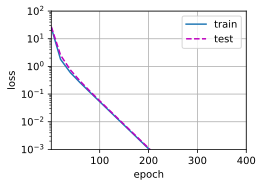

In [26]:
# 从多项式特征中选择前四个维度，即1,x,x^2/2!,x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

### 线性函数拟合（欠拟合）

weight: [[3.0866656 4.1387057]]


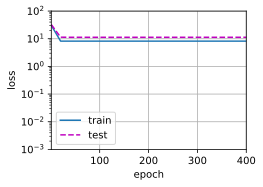

In [32]:
# 从多项式特征中选择前两个维度，即1和x
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

### 高阶多项式函数拟合（过拟合）

weight: [[ 4.99141598e+00  1.28132486e+00 -3.35576344e+00  5.16285181e+00
  -2.13735253e-01  1.25277841e+00  2.03457534e-01  2.14139804e-01
   1.26680518e-02  1.70520693e-01 -2.86535714e-02  4.60727140e-03
   1.48907557e-01  1.14903837e-01 -1.73911527e-02  2.79950351e-02
  -2.96350438e-02  9.44538713e-02  1.17982954e-01 -1.54318422e-01]]


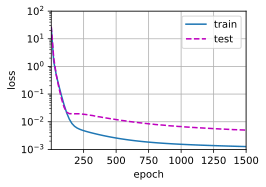

In [35]:
# 从多项式特征中取所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

## 权重衰减

### 高维线性回归

In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [4]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

### 从零开始

In [5]:
# 初始化模型参数
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    # 该分布数据，均值为0，标准差为1
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

In [6]:
# 定义L2范数惩罚
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [10]:
# 定义训练代码实现
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())
    # torch.norm(w)计算w的L2范数

w的L2范数是： 13.522764205932617


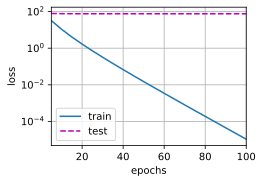

In [11]:
# 未使用权重衰减
train(lambd=0)

w的L2范数是： 0.4036194980144501


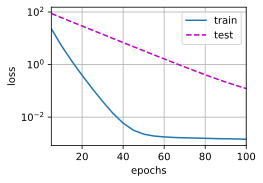

In [12]:
# 使用权重衰减
train(lambd=3)

### 简洁实现

In [13]:
# 我们在实例化优化器时直接通过weight_decay指定weight decay超参数
# 默认情况下，Py-Torch同时衰减权重和偏移。
# 这⾥我们只为权重设置了weight_decay，所以偏置参数b不会衰减
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_() # 用于生成服从标准正态分布（均值为0，标准差为1）的随机数
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {'params':net[0].weight, 'weight_decay':wd},
        {'params':net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

w的L2范数： 12.50944995880127


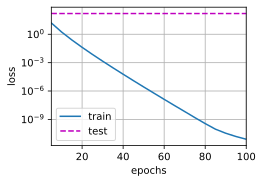

In [14]:
train_concise(0)

w的L2范数： 0.38662418723106384


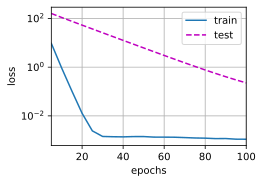

In [15]:
train_concise(3)

In [26]:
def train_concise_(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_() # 用于生成服从标准正态分布（均值为0，标准差为1）的随机数
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {'params':net[0].weight, 'weight_decay':wd},
        {'params':net[0].bias}], lr=lr)
#     animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
#                             xlim=[5, num_epochs], legend=['train', 'test'])
    
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
#         if (epoch + 1) % 5 == 0:
#             animator.add(epoch + 1,
#                          (d2l.evaluate_loss(net, train_iter, loss),
#                           d2l.evaluate_loss(net, test_iter, loss)))
    train_loss = d2l.evaluate_loss(net, train_iter, loss)
    test_loss = d2l.evaluate_loss(net, test_iter, loss)
    return train_loss, test_loss

In [27]:
def test():
    animator = d2l.Animator(xlabel='lambda', ylabel='loss', yscale='log',
                            xlim=[0, 100], legend=['train', 'test'])
    for i in range(101):
        train_loss, test_loss = train_concise_(i)
        animator.add(i, (train_loss, test_loss))

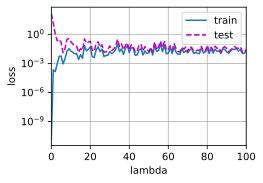

In [28]:
test()


## 暂退法（dropout)

In [29]:
# 我们希望模型深度挖掘特征，即将其权重分散到许多特征中，而不是过于依赖少数潜在的虚假关联

### 重新审视过拟合

In [30]:
# 当面对更多的特征而样本不足时，线性模型往往会过拟合。相反，当给出更多样本⽽不是特征，通常线性模
# 型不会过拟合。不幸的是，线性模型泛化的可靠性是有代价的。简单地说，线性模型没有考虑到特征之间的
# 交互作⽤。对于每个特征，线性模型必须指定正的或负的权重，⽽忽略其他特征。

# 泛化性和灵活性之间的这种基本权衡被描述为偏差-⽅差权衡（bias-variance tradeoff）。线性模型有很⾼的
# 偏差：它们只能表⽰⼀⼩类函数。然⽽，这些模型的⽅差很低：它们在不同的随机数据样本上可以得出相似
# 的结果。

# 深度神经⽹络位于偏差-⽅差谱的另⼀端。与线性模型不同，神经⽹络并不局限于单独查看每个特征，⽽是学
# 习特征之间的交互。例如，神经⽹络可能推断“尼⽇利亚”和“西联汇款”⼀起出现在电⼦邮件中表⽰垃圾
# 邮件，但单独出现则不表⽰垃圾邮件。

# 即使我们有⽐特征多得多的样本，深度神经⽹络也有可能过拟合。2017年，⼀组研究⼈员通过在随机标记的
# 图像上训练深度⽹络。这展⽰了神经⽹络的极⼤灵活性，因为⼈类很难将输⼊和随机标记的输出联系起来，
# 但通过随机梯度下降优化的神经⽹络可以完美地标记训练集中的每⼀幅图像。想⼀想这意味着什么？假设标
# 签是随机均匀分配的，并且有10个类别，那么分类器在测试数据上很难取得⾼于10%的精度，那么这⾥的泛
# 化差距就⾼达90%，如此严重的过拟合。

# 深度⽹络的泛化性质令⼈费解，⽽这种泛化性质的数学基础仍然是悬⽽未决的研究问题。我们⿎励喜好研究
# 理论的读者更深⼊地研究这个主题。本节，我们将着重对实际⼯具的探究，这些⼯具倾向于改进深层⽹络的
# 泛化性。

### 扰动的稳健性

In [31]:
# 在探究泛化性之前，我们先来定义⼀下什么是⼀个“好”的预测模型？我们期待“好”的预测模型能在未知
# 的数据上有很好的表现：经典泛化理论认为，为了缩⼩训练和测试性能之间的差距，应该以简单的模型为⽬
# 标。简单性以较⼩维度的形式展现，我们在 4.4节 讨论线性模型的单项式函数时探讨了这⼀点。此外，正如
# 我们在 4.5节 中讨论权重衰减（L 2 正则化）时看到的那样，参数的范数也代表了⼀种有⽤的简单性度量。
# 简单性的另⼀个⻆度是平滑性，即函数不应该对其输⼊的微⼩变化敏感。例如，当我们对图像进⾏分类时，我
# 们预计向像素添加⼀些随机噪声应该是基本⽆影响的。1995年，克⾥斯托弗·毕晓普证明了具有输⼊噪声的训
# 练等价于Tikhonov正则化 (Bishop, 1995)。这项⼯作⽤数学证实了“要求函数光滑”和“要求函数对输⼊的
# 随机噪声具有适应性”之间的联系。
# 然后在2014年，斯⾥⽡斯塔⽡等⼈ (Srivastava et al., 2014) 就如何将毕晓普的想法应⽤于⽹络的内部层提出
# 了⼀个想法：在训练过程中，他们建议在计算后续层之前向⽹络的每⼀层注⼊噪声。因为当训练⼀个有多层
# 的深层⽹络时，注⼊噪声只会在输⼊-输出映射上增强平滑性。
# 这个想法被称为暂退法（dropout）。暂退法在前向传播过程中，计算每⼀内部层的同时注⼊噪声，这已经成为
# 训练神经⽹络的常⽤技术。这种⽅法之所以被称为暂退法，因为我们从表⾯上看是在训练过程中丢弃（drop
# out）⼀些神经元。在整个训练过程的每⼀次迭代中，标准暂退法包括在计算下⼀层之前将当前层中的⼀些节
# 点置零。
# 需要说明的是，暂退法的原始论⽂提到了⼀个关于有性繁殖的类⽐：神经⽹络过拟合与每⼀层都依赖于前⼀
# 层激活值相关，称这种情况为“共适应性”。作者认为，暂退法会破坏共适应性，就像有性⽣殖会破坏共适应
# 的基因⼀样。
# 那么关键的挑战就是如何注⼊这种噪声。⼀种想法是以⼀种⽆偏向（unbiased）的⽅式注⼊噪声。这样在固
# 定住其他层时，每⼀层的期望值等于没有噪⾳时的值。
# 在毕晓普的⼯作中，他将⾼斯噪声添加到线性模型的输⼊中。在每次训练迭代中，他将从均值为零的分布ϵ ∼
# N(0,σ 2 ) 采样噪声添加到输⼊x，从⽽产⽣扰动点x ′ = x + ϵ，预期是E[x ′ ] = x。

# 在标准暂退法正则化中，通过按保留（未丢弃）的节点的分数进⾏规范化来消除每⼀层的偏差。换⾔之，每
# 个中间活性值h以暂退概率p由随机变量h ′ 替换，如下所⽰：
# h ′ =0，概率为p
#      =  h/1−p，其他情况
# 根据此模型的设计，其期望值保持不变，即E[h ′ ] = h。

### 实践中的暂退法

In [32]:
# 回想⼀下 图4.1.1中带有1个隐藏层和5个隐藏单元的多层感知机。当我们将暂退法应⽤到隐藏层，以p的概率
# 将隐藏单元置为零时，结果可以看作⼀个只包含原始神经元⼦集的⽹络。⽐如在 图4.6.1中，删除了h 2 和h 5 ，
# 因此输出的计算不再依赖于h 2 或h 5 ，并且它们各⾃的梯度在执⾏反向传播时也会消失。这样，输出层的计算
# 不能过度依赖于h 1 ,...,h 5 的任何⼀个元素。
# 通常，我们在测试时不⽤暂退法。给定⼀个训练好的模型和⼀个新的样本，我们不会丢弃任何节点，因此不
# 需要标准化。然⽽也有⼀些例外：⼀些研究⼈员在测试时使⽤暂退法，⽤于估计神经⽹络预测的“不确定性”：
# 如果通过许多不同的暂退法遮盖后得到的预测结果都是⼀致的，那么我们可以说⽹络发挥更稳定。

### 从零开始实现

In [33]:
# 要实现单层的暂退法函数，我们从均匀分布U[0,1]中抽取样本，样本数与这层神经⽹络的维度⼀致。然后我
# 们保留那些对应样本⼤于p的节点，把剩下的丢弃。
# 在下⾯的代码中，我们实现 dropout_layer 函数，该函数以dropout的概率丢弃张量输⼊X中的元素，如上所
# 述重新缩放剩余部分：将剩余部分除以1.0-dropout。

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # 在本情况中，所有元素都被丢弃
    if dropout == 0:
        return torch.zeros_like(X)
    
    # 在本情况中，所有元素都被保留
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    # (torch.rand(3)>0.3).float()->tensor([1., 1., 0.])
    return mask * X / (1.0 - dropout)

In [3]:
(torch.rand(3)>0.3).float()

tensor([0., 1., 1.])

In [4]:
# 我们可以通过下⾯⼏个例⼦来测试dropout_layer函数。我们将输⼊X通过暂退法操作，暂退概率分别为0、
# 0.5和1。
X = torch.arange(16, dtype = torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0,))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[ 0.,  0.,  0.,  6.,  8., 10., 12.,  0.],
        [16.,  0.,  0.,  0., 24., 26.,  0.,  0.]])
tensor([[nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan]])


In [5]:
# 定义模型参数
# 同样，我们使⽤ 3.5节中引⼊的Fashion-MNIST数据集。我们定义具有两个隐藏层的多层感知机，每个隐藏层
# 包含256个单元。
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

In [6]:
# 定义模型
# 我们可以将暂退法应⽤于每个隐藏层的输出（在激活函数之后），并且可以为每⼀层分别设置暂退概率：常
# ⻅的技巧是在靠近输⼊层的地⽅设置较低的暂退概率。下⾯的模型将第⼀个和第⼆个隐藏层的暂退概率分别
# 设置为0.2和0.5，并且暂退法只在训练期间有效。
dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                 is_training = True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()
    
    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # 只有在训练模型时才使用dropout
        if self.training == True:
            # 在第一个全连接层之后添加一个dropout层
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            # 在第二个全连接层之后添加一个dropout层
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out

In [7]:
net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

In [8]:
# 训练和测试
num_epochs,  lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)

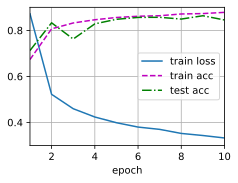

In [9]:
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 简洁实现

In [11]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                   # 在第一个全连接层之后添加一个dropout层
                   nn.Dropout(dropout1),
                   nn.Linear(256, 256),
                   nn.ReLU(),
                   # 在第二个全连接层之后添加一个dropout层
                   nn.Dropout(dropout2),
                   nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

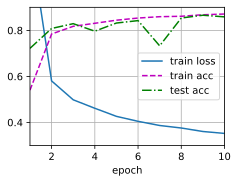

In [13]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 前向传播、反向传播和计算图

In [1]:
# 我们已经学习了如何⽤⼩批量随机梯度下降训练模型。然⽽当实现该算法时，我们只考虑了通过前向传播
# （forward propagation）所涉及的计算。在计算梯度时，我们只调⽤了深度学习框架提供的反向传播函数，⽽
# 不知其所以然。
# 梯度的⾃动计算（⾃动微分）⼤⼤简化了深度学习算法的实现。在⾃动微分之前，即使是对复杂模型的微⼩
# 调整也需要⼿⼯重新计算复杂的导数，学术论⽂也不得不分配⼤量⻚⾯来推导更新规则。本节将通过⼀些基
# 本的数学和计算图，深⼊探讨反向传播的细节。⾸先，我们将重点放在带权重衰减（L 2 正则化）的单隐藏层
# 多层感知机上。

In [2]:
# 在训练神经⽹络时，前向传播和反向传播相互依赖。对于前向传播，我们沿着依赖的⽅向遍历计算图并计算
# 其路径上的所有变量。然后将这些⽤于反向传播，其中计算顺序与计算图的相反。
# 以上述简单⽹络为例：⼀⽅⾯，在前向传播期间计算正则项 (4.7.5)取决于模型参数W (1) 和 W (2) 的当前值。它
# 们是由优化算法根据最近迭代的反向传播给出的。另⼀⽅⾯，反向传播期间参数 (4.7.11)的梯度计算，取决于
# 由前向传播给出的隐藏变量h的当前值。
# 因此，在训练神经⽹络时，在初始化模型参数后，我们交替使⽤前向传播和反向传播，利⽤反向传播给出的
# 梯度来更新模型参数。注意，反向传播重复利⽤前向传播中存储的中间值，以避免重复计算。带来的影响之
# ⼀是我们需要保留中间值，直到反向传播完成。这也是训练⽐单纯的预测需要更多的内存（显存）的原因之
# ⼀。此外，这些中间值的⼤⼩与⽹络层的数量和批量的⼤⼩⼤致成正⽐。因此，使⽤更⼤的批量来训练更深
# 层次的⽹络更容易导致内存不⾜（out of memory）错误。

## 数值稳定和模型初始化

In [3]:
# 到⽬前为⽌，我们实现的每个模型都是根据某个预先指定的分布来初始化模型的参数。有⼈会认为初始化⽅
# 案是理所当然的，忽略了如何做出这些选择的细节。甚⾄有⼈可能会觉得，初始化⽅案的选择并不是特别重
# 要。相反，初始化⽅案的选择在神经⽹络学习中起着举⾜轻重的作⽤，它对保持数值稳定性⾄关重要。此外，
# 这些初始化⽅案的选择可以与⾮线性激活函数的选择有趣的结合在⼀起。我们选择哪个函数以及如何初始化
# 参数可以决定优化算法收敛的速度有多快。糟糕选择可能会导致我们在训练时遇到梯度爆炸或梯度消失。本
# 节将更详细地探讨这些主题，并讨论⼀些有⽤的启发式⽅法。这些启发式⽅法在整个深度学习⽣涯中都很有
# ⽤。

In [4]:
# 因此，我们容易受到数值下溢问题
# 的影响. 当将太多的概率乘在⼀起时，这些问题经常会出现。在处理概率时，⼀个常⻅的技巧是切换到对数
# 空间，即将数值表⽰的压⼒从尾数转移到指数。不幸的是，上⾯的问题更为严重：最初，矩阵 M (l) 可能具有
# 各种各样的特征值。他们可能很⼩，也可能很⼤；他们的乘积可能⾮常⼤，也可能⾮常⼩。
# 不稳定梯度带来的⻛险不⽌在于数值表⽰；不稳定梯度也威胁到我们优化算法的稳定性。我们可能⾯临⼀些
# 问题。要么是梯度爆炸（gradient exploding）问题：参数更新过⼤，破坏了模型的稳定收敛；要么是梯度消
# 失（gradient vanishing）问题：参数更新过⼩，在每次更新时⼏乎不会移动，导致模型⽆法学习。

In [5]:
# 因为在反向传播的过程中，根据链式法则，梯度是相乘的关系，所以会出现数值下溢的风险

In [6]:
# 梯度消失
# 曾经sigmoid函数1/(1 + exp(−x))（4.1节提到过）很流⾏，因为它类似于阈值函数。由于早期的⼈⼯神经⽹
# 络受到⽣物神经⽹络的启发，神经元要么完全激活要么完全不激活（就像⽣物神经元）的想法很有吸引⼒。
# 然⽽，它却是导致梯度消失问题的⼀个常⻅的原因，让我们仔细看看sigmoid函数为什么会导致梯度消失。

In [7]:
%matplotlib inline
import torch
from d2l import torch as d2l

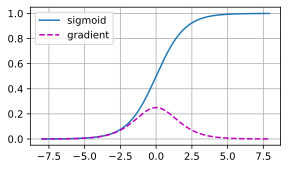

In [8]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

In [9]:
# 正如上图，当sigmoid函数的输⼊很⼤或是很⼩时，它的梯度都会消失。此外，当反向传播通过许多层时，除
# ⾮我们在刚刚好的地⽅，这些地⽅sigmoid函数的输⼊接近于零，否则整个乘积的梯度可能会消失。当我们
# 的⽹络有很多层时，除⾮我们很⼩⼼，否则在某⼀层可能会切断梯度。事实上，这个问题曾经困扰着深度⽹
# 络的训练。因此，更稳定的ReLU系列函数已经成为从业者的默认选择（虽然在神经科学的⻆度看起来不太合
# 理）。

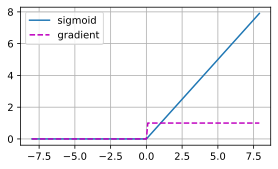

In [11]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

In [12]:
# 梯度爆炸
# 相反，梯度爆炸可能同样令⼈烦恼。为了更好地说明这⼀点，我们⽣成100个⾼斯随机矩阵，并将它们与某个
# 初始矩阵相乘。对于我们选择的尺度（⽅差σ 2 = 1），矩阵乘积发⽣爆炸。当这种情况是由于深度⽹络的初始
# 化所导致时，我们没有机会让梯度下降优化器收敛。

In [13]:
M = torch.normal(0, 1, size=(4, 4))
print('一个矩阵\n', M)
for i in range(100):
    M = torch.mm(M, torch.normal(0, 1, size=(4, 4)))

print('乘以100个矩阵后\n', M)

一个矩阵
 tensor([[ 0.4283, -0.3228, -1.7991,  0.3271],
        [ 0.0476,  0.1538,  0.6051, -0.2836],
        [ 0.9685,  0.5722, -1.4629, -1.2331],
        [-1.9598,  0.3384,  0.4313,  1.5296]])
乘以100个矩阵后
 tensor([[ 6.0055e+21,  2.3699e+22,  2.8558e+22,  5.1299e+21],
        [-1.3021e+22, -5.1383e+22, -6.1918e+22, -1.1122e+22],
        [-8.9362e+22, -3.5265e+23, -4.2495e+23, -7.6333e+22],
        [ 8.3612e+22,  3.2996e+23,  3.9761e+23,  7.1420e+22]])


In [14]:
# 打破对称性
# 神经⽹络设计中的另⼀个问题是其参数化所固有的对称性。假设我们有⼀个简单的多层感知机，它有⼀个隐
# 藏层和两个隐藏单元。在这种情况下，我们可以对第⼀层的权重W (1) 进⾏重排列，并且同样对输出层的权重
# 进⾏重排列，可以获得相同的函数。第⼀个隐藏单元与第⼆个隐藏单元没有什么特别的区别。换句话说，我
# 们在每⼀层的隐藏单元之间具有排列对称性。
# 假设输出层将上述两个隐藏单元的多层感知机转换为仅⼀个输出单元。想象⼀下，如果我们将隐藏层的所有
# 参数初始化为W (1) = c，c为常量，会发⽣什么？在这种情况下，在前向传播期间，两个隐藏单元采⽤相同
# 的输⼊和参数，产⽣相同的激活，该激活被送到输出单元。在反向传播期间，根据参数W (1) 对输出单元进⾏
# 微分，得到⼀个梯度，其元素都取相同的值。因此，在基于梯度的迭代（例如，⼩批量随机梯度下降）之后，
# W (1) 的所有元素仍然采⽤相同的值。这样的迭代永远不会打破对称性，我们可能永远也⽆法实现⽹络的表达
# 能⼒。隐藏层的⾏为就好像只有⼀个单元。请注意，虽然⼩批量随机梯度下降不会打破这种对称性，但暂退
# 法正则化可以。

### 参数初始化

In [15]:
# 解决（或至少减轻）上述问题的一种方法是进行参数初始化，优化期间的注意和适当的正则化也可以进一步
# 提高稳定性

In [16]:
# 默认初始化
# 在前⾯的部分中，例如在 3.3节中，我们使⽤正态分布来初始化权重值。如果我们不指定初始化⽅法，框架将
# 使⽤默认的随机初始化⽅法，对于中等难度的问题，这种⽅法通常很有效。

## 环境和分布偏移

In [17]:
# 前⾯我们学习了许多机器学习的实际应⽤，将模型拟合各种数据集。然⽽，我们从来没有想过数据最初从哪
# ⾥来？以及我们计划最终如何处理模型的输出？通常情况下，开发⼈员会拥有⼀些数据且急于开发模型，⽽
# 不关注这些基本问题。
# 许多失败的机器学习部署（即实际应⽤）都可以追究到这种⽅式。有时，根据测试集的精度衡量，模型表现
# 得⾮常出⾊。但是当数据分布突然改变时，模型在部署中会出现灾难性的失败。更隐蔽的是，有时模型的部
# 署本⾝就是扰乱数据分布的催化剂。举⼀个有点荒谬却可能真实存在的例⼦。假设我们训练了⼀个贷款申请
# ⼈违约⻛险模型，⽤来预测谁将偿还贷款或违约。这个模型发现申请⼈的鞋⼦与违约⻛险相关（穿⽜津鞋申
# 请⼈会偿还，穿运动鞋申请⼈会违约）。此后，这个模型可能倾向于向所有穿着⽜津鞋的申请⼈发放贷款，并
# 拒绝所有穿着运动鞋的申请⼈。
# 这种情况可能会带来灾难性的后果。⾸先，⼀旦模型开始根据鞋类做出决定，顾客就会理解并改变他们的⾏
# 为。不久，所有的申请者都会穿⽜津鞋，⽽信⽤度却没有相应的提⾼。总⽽⾔之，机器学习的许多应⽤中都
# 存在类似的问题：通过将基于模型的决策引⼊环境，我们可能会破坏模型。
# 虽然我们不可能在⼀节中讨论全部的问题，但我们希望揭⽰⼀些常⻅的问题，并激发批判性思考，以便及早
# 发现这些情况，减轻灾难性的损害。有些解决⽅案很简单（要求“正确”的数据），有些在技术上很困难（实
# 施强化学习系统），还有⼀些解决⽅案要求我们完全跳出统计预测，解决⼀些棘⼿的、与算法伦理应⽤有关的
# 哲学问题。

### 分布偏移的类型

In [18]:
# ⾸先，我们考虑数据分布可能发⽣变化的各种⽅式，以及为挽救模型性能可能采取的措施。在⼀个经典的情
# 景中，假设训练数据是从某个分布p S (x,y)中采样的，但是测试数据将包含从不同分布p T (x,y)中抽取的未标
# 记样本。⼀个清醒的现实是：如果没有任何关于p S 和p T 之间相互关系的假设，学习到⼀个分类器是不可能的。
# 考虑⼀个⼆元分类问题：区分狗和猫。如果分布可以以任意⽅式偏移，那么我们的情景允许病态的情况，即
# 输⼊的分布保持不变：p S (x) = p T (x)，但标签全部翻转：p S (y|x) = 1 − p T (y|x)。换⾔之，如果将来所有的
# “猫”现在都是狗，⽽我们以前所说的“狗”现在是猫。⽽此时输⼊p(x)的分布没有任何改变，那么我们就不
# 可能将这种情景与分布完全没有变化的情景区分开。
# 幸运的是，在对未来我们的数据可能发⽣变化的⼀些限制性假设下，有些算法可以检测这种偏移，甚⾄可以
# 动态调整，提⾼原始分类器的精度。

In [19]:
# 协变量偏移
# 在不同分布偏移中，协变量偏移可能是最为⼴泛研究的。这⾥我们假设：虽然输⼊的分布可能随时间⽽改变，
# 但标签函数（即条件分布P(y | x)）没有改变。统计学家称之为协变量偏移（covariate shift），因为这个问题
# 是由于协变量（特征）分布的变化⽽产⽣的。虽然有时我们可以在不引⽤因果关系的情况下对分布偏移进⾏
# 推断，但在我们认为x导致y的情况下，协变量偏移是⼀种⾃然假设。

In [20]:
# 标签偏移
# 标签偏移（label shift）描述了与协变量偏移相反的问题。这⾥我们假设标签边缘概率P(y)可以改变，但是类
# 别条件分布P(x | y)在不同的领域之间保持不变。当我们认为y导致x时，标签偏移是⼀个合理的假设。例如，
# 预测患者的疾病，我们可能根据症状来判断，即使疾病的相对流⾏率随着时间的推移⽽变化。标签偏移在这
# ⾥是恰当的假设，因为疾病会引起症状。在另⼀些情况下，标签偏移和协变量偏移假设可以同时成⽴。例如，
# 当标签是确定的，即使y导致x，协变量偏移假设也会得到满⾜。有趣的是，在这些情况下，使⽤基于标签偏
# 移假设的⽅法通常是有利的。这是因为这些⽅法倾向于包含看起来像标签（通常是低维）的对象，⽽不是像
# 输⼊（通常是⾼维的）对象。

In [21]:
# 概念偏移
# 我们也可能会遇到概念偏移（concept shift）：当标签的定义发⽣变化时，就会出现这种问题。这听起来很奇
# 怪——⼀只猫就是⼀只猫，不是吗？然⽽，其他类别会随着不同时间的⽤法⽽发⽣变化。精神疾病的诊断标
# 准、所谓的时髦、以及⼯作头衔等等，都是概念偏移的⽇常映射。事实证明，假如我们环游美国，根据所在
# 的地理位置改变我们的数据来源，我们会发现关于“软饮”名称的分布发⽣了相当⼤的概念偏移

### 分布偏移示例

In [22]:
# 医学诊断
# 假设我们想设计⼀个检测癌症的算法，从健康⼈和病⼈那⾥收集数据，然后训练算法。它⼯作得很好，有很
# ⾼的精度，然后我们得出了已经准备好在医疗诊断上取得成功的结论。请先别着急。
# 收集训练数据的分布和在实际中遇到的数据分布可能有很⼤的不同。这件事在⼀个不幸的初创公司⾝上发⽣
# 过，我们中的⼀些作者⼏年前和他们合作过。他们正在研究⼀种⾎液检测⽅法，主要针对⼀种影响⽼年男性
# 的疾病，并希望利⽤他们从病⼈⾝上采集的⾎液样本进⾏研究。然⽽，从健康男性⾝上获取⾎样⽐从系统中
# 已有的病⼈⾝上获取要困难得多。作为补偿，这家初创公司向⼀所⼤学校园内的学⽣征集献⾎，作为开发测
# 试的健康对照样本。然后这家初创公司问我们是否可以帮助他们建⽴⼀个⽤于检测疾病的分类器。
# 正如我们向他们解释的那样，⽤近乎完美的精度来区分健康和患病⼈群确实很容易。然⽽，这可能是因为受
# 试者在年龄、激素⽔平、体⼒活动、饮⻝、饮酒以及其他许多与疾病⽆关的因素上存在差异。这对检测疾病
# 的分类器可能并不适⽤。这些抽样可能会遇到极端的协变量偏移。此外，这种情况不太可能通过常规⽅法加
# 以纠正。简⾔之，他们浪费了⼀⼤笔钱。

In [23]:
# ⾃动驾驶汽⻋
# 对于⼀家想利⽤机器学习来开发⾃动驾驶汽⻋的公司，⼀个关键部件是“路沿检测器”。由于真实的注释数
# 据获取成本很⾼，他们想出了⼀个“聪明”的想法：将游戏渲染引擎中的合成数据⽤作额外的训练数据。这
# 对从渲染引擎中抽取的“测试数据”⾮常有效，但应⽤在⼀辆真正的汽⻋⾥真是⼀场灾难。正如事实证明的
# 那样，路沿被渲染成⼀种⾮常简单的纹理。更重要的是，所有的路沿都被渲染成了相同的纹理，路沿检测器
# 很快就学习到了这个“特征”。
# 当美军第⼀次试图在森林中探测坦克时，也发⽣了类似的事情。他们在没有坦克的情况下拍摄了森林的航拍
# 照⽚，然后把坦克开进森林，拍摄了另⼀组照⽚。使⽤这两组数据训练的分类器似乎⼯作得很好。不幸的是，
# 分类器仅仅学会了如何区分有阴影的树和没有阴影的树：第⼀组照⽚是在清晨拍摄的，⽽第⼆组是在中午拍
# 摄的。

In [24]:
# ⾮平稳分布
# 当分布变化缓慢并且模型没有得到充分更新时，就会出现更微妙的情况：⾮平稳分布（nonstationary distri-
# bution）。以下是⼀些典型例⼦：
# • 训练⼀个计算⼴告模型，但却没有经常更新（例如，⼀个2009年训练的模型不知道⼀个叫iPad的不知名
# 新设备刚刚上市）；
# • 建⽴⼀个垃圾邮件过滤器，它能很好地检测到所有垃圾邮件。但是，垃圾邮件发送者们变得聪明起来，
# 制造出新的信息，看起来不像我们以前⻅过的任何垃圾邮件；
# • 建⽴⼀个产品推荐系统，它在整个冬天都有效，但圣诞节过后很久还会继续推荐圣诞帽。

In [25]:
# 更多轶事
# • 建⽴⼀个⼈脸检测器，它在所有基准测试中都能很好地⼯作，但是它在测试数据上失败了：有问题的例
# ⼦是⼈脸充满了整个图像的特写镜头（训练集中没有这样的数据）。
# • 为美国市场建⽴了⼀个⽹络搜索引擎，并希望将其部署到英国。
# • 通过在⼀个⼤的数据集来训练图像分类器，其中每⼀个⼤类的数量在数据集近乎是平均的，⽐如1000个
# 类别，每个类别由1000个图像表⽰。但是将该系统部署到真实世界中，照⽚的实际标签分布显然是不均
# 匀的。

### 分布偏移纠正

In [26]:
# 正如我们所讨论的，在许多情况下训练和测试分布P(x,y)是不同的。在⼀些情况下，我们很幸运，不管协变
# 量、标签或概念如何发⽣偏移，模型都能正常⼯作。在另⼀些情况下，我们可以通过运⽤策略来应对这种偏
# 移，从⽽做得更好。本节的其余部分将着重于应对这种偏移的技术细节。

### 学习问题的分类法

In [27]:
# 批量学习
# 在批量学习（batch learning）中，我们可以访问⼀组训练特征和标签 {(x 1 ,y 1 ),...,(x n ,y n )}，我们使⽤这
# 些特性和标签训练f(x)。然后，我们部署此模型来对来⾃同⼀分布的新数据(x,y)进⾏评分。例如，我们可以
# 根据猫和狗的⼤量图⽚训练猫检测器。⼀旦我们训练了它，我们就把它作为智能猫⻔计算视觉系统的⼀部分，
# 来控制只允许猫进⼊。然后这个系统会被安装在客⼾家中，基本再也不会更新。

In [28]:
# 在线学习
# 除了“批量”地学习，我们还可以单个“在线”学习数据(x i ,y i )。更具体地说，我们⾸先观测到x i ，然后我们
# 得出⼀个估计值f(x i )，只有当我们做到这⼀点后，我们才观测到y i 。然后根据我们的决定，我们会得到奖励
# 或损失。许多实际问题都属于这⼀类。例如，我们需要预测明天的股票价格，这样我们就可以根据这个预测
# 进⾏交易。在⼀天结束时，我们会评估我们的预测是否盈利。换句话说，在在线学习（online learning）中，
# 我们有以下的循环。在这个循环中，给定新的观测结果，我们会不断地改进我们的模型。
# model f t −→ data x t −→ estimate f t (x t ) −→ observation y t −→ loss l(y t ,f t (x t )) −→ model f t+1 

In [29]:
# ⽼虎机
# ⽼⻁机（bandits）是上述问题的⼀个特例。虽然在⼤多数学习问题中，我们有⼀个连续参数化的函数f（例
# 如，⼀个深度⽹络）。但在⼀个⽼⻁机问题中，我们只有有限数量的⼿臂可以拉动。也就是说，我们可以采取
# 的⾏动是有限的。对于这个更简单的问题，可以获得更强的最优性理论保证，这并不令⼈惊讶。我们之所以
# 列出它，主要是因为这个问题经常被视为⼀个单独的学习问题的情景。

In [30]:
# 控制
# 在很多情况下，环境会记住我们所做的事。不⼀定是以⼀种对抗的⽅式，但它会记住，⽽且它的反应将取决于
# 之前发⽣的事情。例如，咖啡锅炉控制器将根据之前是否加热锅炉来观测到不同的温度。在这种情况下，PID
# （⽐例—积分—微分）控制器算法是⼀个流⾏的选择。同样，⼀个⽤⼾在新闻⽹站上的⾏为将取决于之前向她
# 展⽰的内容（例如，⼤多数新闻她只阅读⼀次）。许多这样的算法形成了⼀个环境模型，在这个模型中，他们
# 的⾏为使得他们的决策看起来不那么随机。近年来，控制理论（如PID的变体）也被⽤于⾃动调整超参数，以
# 获得更好的解构和重建质量，提⾼⽣成⽂本的多样性和⽣成图像的重建质量

In [31]:
# 强化学习
# 强化学习（reinforcement learning）强调如何基于环境⽽⾏动，以取得最⼤化的预期利益。国际象棋、围棋、
# 西洋双陆棋或星际争霸都是强化学习的应⽤实例。再⽐如，为⾃动驾驶汽⻋制造⼀个控制器，或者以其他⽅
# 式对⾃动驾驶汽⻋的驾驶⽅式做出反应（例如，试图避开某物体，试图造成事故，或者试图与其合作）。

In [32]:
# 考虑到环境
# 上述不同情况之间的⼀个关键区别是：在静⽌环境中可能⼀直有效的相同策略，在环境能够改变的情况下可
# 能不会始终有效。例如，⼀个交易者发现的套利机会很可能在他开始利⽤它时就消失了。环境变化的速度和
# ⽅式在很⼤程度上决定了我们可以采⽤的算法类型。例如，如果我们知道事情只会缓慢地变化，就可以迫使
# 任何估计也只能缓慢地发⽣改变。如果我们知道环境可能会瞬间发⽣变化，但这种变化⾮常罕⻅，我们就可
# 以在使⽤算法时考虑到这⼀点。当⼀个数据科学家试图解决的问题会随着时间的推移⽽发⽣变化时，这些类
# 型的知识⾄关重要。

### 机器学习中的公平、责任和透明度

In [33]:
# 最后，重要的是，当我们部署机器学习系统时，不仅仅是在优化⼀个预测模型，⽽通常是在提供⼀个会被⽤
# 来（部分或完全）进⾏⾃动化决策的⼯具。这些技术系统可能会通过其进⾏的决定⽽影响到每个⼈的⽣活。
# 从考虑预测到决策的⻜跃不仅提出了新的技术问题，⽽且还提出了⼀系列必须仔细考虑的伦理问题。如果我
# 们正在部署⼀个医疗诊断系统，我们需要知道它可能适⽤于哪些⼈群，哪些⼈群可能⽆效。忽视对⼀个亚群
# 体的幸福的可预⻅⻛险可能会导致我们执⾏劣质的护理⽔平。此外，⼀旦我们规划整个决策系统，我们必须
# 退后⼀步，重新考虑如何评估我们的技术。在这个视野变化所导致的结果中，我们会发现精度很少成为合适
# 的衡量标准。例如，当我们将预测转化为⾏动时，我们通常会考虑到各种⽅式犯错的潜在成本敏感性。举个
# 例⼦：将图像错误地分到某⼀类别可能被视为种族歧视，⽽错误地分到另⼀个类别是⽆害的，那么我们可能
# 需要相应地调整我们的阈值，在设计决策⽅式时考虑到这些社会价值。我们还需要注意预测系统如何导致反
# 馈循环。例如，考虑预测性警务系统，它将巡逻⼈员分配到预测犯罪率较⾼的地区。很容易看出⼀种令⼈担
# 忧的模式是如何出现的：
# 1. 犯罪率⾼的社区会得到更多的巡逻；
# 2. 因此，在这些社区中会发现更多的犯罪⾏为，输⼊可⽤于未来迭代的训练数据；
# 3. ⾯对更多的积极因素，该模型预测这些社区还会有更多的犯罪；
# 4. 下⼀次迭代中，更新后的模型会更加倾向于针对同⼀个地区，这会导致更多的犯罪⾏为被发现等等。
# 通常，在建模纠正过程中，模型的预测与训练数据耦合的各种机制都没有得到解释，研究⼈员称之为“失控
# 反馈循环”的现象。此外，我们⾸先要注意我们是否解决了正确的问题。⽐如，预测算法现在在信息传播中
# 起着巨⼤的中介作⽤，个⼈看到的新闻应该由他们喜欢的Facebook⻚⾯决定吗？这些只是在机器学习职业⽣
# 涯中可能遇到的令⼈感到“压⼒⼭⼤”的道德困境中的⼀⼩部分。

## 实战Kaagle比赛：预测房价

In [34]:
# 之前⼏节我们学习了⼀些训练深度⽹络的基本⼯具和⽹络正则化的技术（如权重衰减、暂退法等）。本节我
# 们将通过Kaggle⽐赛，将所学知识付诸实践。Kaggle的房价预测⽐赛是⼀个很好的起点。此数据集由Bart de
# Cock于2011年收集 (De Cock, 2011)，涵盖了2006-2010年期间亚利桑那州埃姆斯市的房价。这个数据集是相
# 当通⽤的，不会需要使⽤复杂模型架构。它⽐哈⾥森和鲁宾菲尔德的波⼠顿房价 71 数据集要⼤得多，也有更
# 多的特征。
# 本节我们将详细介绍数据预处理、模型设计和超参数选择。通过亲⾝实践，你将获得⼀⼿经验，这些经验将
# 有益数据科学家的职业成⻓。

### 下载和缓存数据集

In [35]:
# 在整本书中，我们将下载不同的数据集，并训练和测试模型。这⾥我们实现⼏个函数来⽅便下载数据。⾸先，
# 我们建⽴字典DATA_HUB，它可以将数据集名称的字符串映射到数据集相关的⼆元组上，这个⼆元组包含数据
# 集的url和验证⽂件完整性的sha-1密钥。所有类似的数据集都托管在地址为DATA_URL的站点上。

In [36]:
import hashlib
import os
import tarfile
import zipfile
import requests

In [37]:
DATA_HUB = dict()
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/'

In [38]:
# 下⾯的download函数⽤来下载数据集，将数据集缓存在本地⽬录（默认情况下为../data）中，并返回下载⽂
# 件的名称。如果缓存⽬录中已经存在此数据集⽂件，并且其sha-1与存储在DATA_HUB中的相匹配，我们将使⽤
# 缓存的⽂件，以避免重复的下载。

In [40]:
# d2l.download()
def download(name, cache_dir=os.path.join('..', 'data')):
    """下载一个DATA_HUB中的文件，返回本地文件名"""
    assert name in DATA_HUB, f"{name} 不存在于 {DATA_HUB}"
    url, sha1_hash = DATA_HUB[name]
    os.makedirs(cache_dir, exist_ok=True)
    fname = os.path.join(cache_dir, url.split('/')[-1])
    
    if os.path.exists(fname):
        sha1 = hashlib.sha1()
        with open(fname, 'rb') as f:
            while True:
                data = f.read(1048576)
                if not data:
                    break
                sha1.updata(data)
        if sha1.hexdigest() == sha1_hash:
            return fname # 命中缓存
        
    print(f'正在从{url}下载{fname}...')
    r = requests.get(url, stream=True, verify=True)
    with open(fname, 'wb') as f:
        f.write(r.content)
    return fname

In [41]:
# 我们还需实现两个实⽤函数：⼀个将下载并解压缩⼀个zip或tar⽂件，另⼀个是将本书中使⽤的所有数据集
# 从DATA_HUB下载到缓存⽬录中

In [42]:
# d2l.download_extract()
def download_extract(name, folder=None):
    """下载并解压zip/tar文件"""
    fname = download(name)
    base_dir = os.path.dirname(fname)
    data_dir, ext = os.path.splitext(fname)
    if ext == '.zip':
        fp = zipfile.ZipFile(fname, 'r')
    elif ext in ('.tar', '.gz'):
        fp = tarfile.open(fname, 'r')
    else:
        assert False, '只有zip/tar文件可以被解压缩'
    fp.extractall(base_dir)
    return os.path.join(base_dir, folder) if folder else data_dir

# d2l.download_all()
def download_all():
    """下载DATA_HUB中的所有文件"""
    for name in DATA_HUB:
        download(name)

### Kaggle

In [43]:
# Kaggle 72 是⼀个当今流⾏举办机器学习⽐赛的平台，每场⽐赛都以⾄少⼀个数据集为中⼼。许多⽐赛有赞助
# ⽅，他们为获胜的解决⽅案提供奖⾦。该平台帮助⽤⼾通过论坛和共享代码进⾏互动，促进协作和竞争。虽然
# 排⾏榜的追逐往往令⼈失去理智：有些研究⼈员短视地专注于预处理步骤，⽽不是考虑基础性问题。但⼀个
# 客观的平台有巨⼤的价值：该平台促进了竞争⽅法之间的直接定量⽐较，以及代码共享。这便于每个⼈都可以
# 学习哪些⽅法起作⽤，哪些没有起作⽤。

### 访问和读取数据集

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l

In [45]:
# d2l.DATA_HUB()
DATA_HUB['kaggle_house_train'] = ( #@save
DATA_URL + 'kaggle_house_pred_train.csv',
'585e9cc93e70b39160e7921475f9bcd7d31219ce')

DATA_HUB['kaggle_house_test'] = ( #@save
DATA_URL + 'kaggle_house_pred_test.csv',
'fa19780a7b011d9b009e8bff8e99922a8ee2eb90')

In [46]:
d2l.DATA_HUB['kaggle_house_train']

('http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_train.csv',
 '585e9cc93e70b39160e7921475f9bcd7d31219ce')

In [47]:
d2l.DATA_URL

'http://d2l-data.s3-accelerate.amazonaws.com/'

In [48]:
# train_data = pd.read_csv(download('kaggle_house_train'))
# test_data = pd.read_csv(download('kaggle_house_test'))

正在从http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_train.csv下载..\data\kaggle_house_pred_train.csv...
正在从http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_test.csv下载..\data\kaggle_house_pred_test.csv...


In [2]:
train_data = pd.read_csv('..\data\kaggle_house_pred_train.csv')
test_data = pd.read_csv('..\data\kaggle_house_pred_test.csv')

In [3]:
train_data.shape

(1460, 81)

In [4]:
test_data.shape

(1459, 80)

In [5]:
# 让我们看看前四个和最后两个特征，以及相应标签（房价）。
train_data.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]]

,Id,MSSubClass,MSZoning,LotFrontage,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,WD,Normal,208500
1,2,20,RL,80.0,WD,Normal,181500
2,3,60,RL,68.0,WD,Normal,223500
3,4,70,RL,60.0,WD,Abnorml,140000


In [6]:
# 我们可以看到，在每个样本中，第⼀个特征是ID，这有助于模型识别每个训练样本。虽然这很⽅便，但它不
# 携带任何⽤于预测的信息。因此，在将数据提供给模型之前，我们将其从数据集中删除。
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))

### 数据预处理

In [56]:
# 如上所述，我们有各种各样的数据类型。在开始建模之前，我们需要对数据进⾏预处理。⾸先，我们将所有
# 缺失的值替换为相应特征的平均值。然后，为了将所有特征放在⼀个共同的尺度上，我们通过将特征重新缩
# 放到零均值和单位⽅差来标准化数据：
# x ←(x − µ)/σ,
# 其中µ和σ分别表⽰均值和标准差。现在，这些特征具有零均值和单位⽅差，即 E[(x−µ)/σ] =(µ−µ)/σ= 0和E[(x −
# µ)^2] = (σ^2 +µ^2 )−2µ^2 +µ^2 = σ^2 。直观地说，我们标准化数据有两个原因：⾸先，它⽅便优化。其次，因为
# 我们不知道哪些特征是相关的，所以我们不想让惩罚分配给⼀个特征的系数⽐分配给其他任何特征的系数更
# ⼤。

In [7]:
# 若无法获得测试数据，则可根据训练数据计算均值和标准差
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))

# 在标准化数据之后，所有均值消失，因此我们可以将缺失值设置为0
all_features[numeric_features] = all_features[numeric_features].fillna(0)

In [59]:
# 接下来，我们处理离散值。这包括诸如“MSZoning”之类的特征。我们⽤独热编码替换它们，⽅法与前⾯
# 将多类别标签转换为向量的⽅式相同（请参⻅ 3.4.1节）。例如，“MSZoning”包含值“RL”和“Rm”。我
# 们将创建两个新的指⽰器特征“MSZoning_RL”和“MSZoning_RM”，其值为0或1。根据独热编码，如果
# “MSZoning”的原始值为“RL”，则：“MSZoning_RL”为1，“MSZoning_RM”为0。pandas软件包会⾃动为
# 我们实现这⼀点。

In [8]:
# "Dummy_na=True"将"na"（缺失值）视为有效的特征值，并为其创建指示符特征
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features.shape

(2919, 331)

In [9]:
# 可以看到此转换会将特征的总数量从79个增加到331个。最后，通过values属性，我们可以从pandas格式中提
# 取NumPy格式，并将其转换为张量表⽰⽤于训练。
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32)
train_labels = torch.tensor(
    train_data.SalePrice.values.reshape(-1, 1), dtype=torch.float32)

### 训练

In [63]:
# ⾸先，我们训练⼀个带有损失平⽅的线性模型。显然线性模型很难让我们在竞赛中获胜，但线性模型提供了
# ⼀种健全性检查，以查看数据中是否存在有意义的信息。如果我们在这⾥不能做得⽐随机猜测更好，那么我
# 们很可能存在数据处理错误。如果⼀切顺利，线性模型将作为基线（baseline）模型，让我们直观地知道最
# 好的模型有超出简单的模型多少。

In [75]:
loss = nn.MSELoss()
in_features = train_features.shape[1]

def get_net():
    net = nn.Sequential(nn.Linear(in_features, 1))
    return net

In [66]:
# 房价就像股票价格⼀样，我们关⼼的是相对数量，⽽不是绝对数量。因此，我们更关⼼相对误差 (y−ˆ y)/y
# ，⽽不是绝对误差y − ˆ y。例如，如果我们在俄亥俄州农村地区估计⼀栋房⼦的价格时，假设我们的预测偏差了10万美
# 元，然⽽那⾥⼀栋典型的房⼦的价值是12.5万美元，那么模型可能做得很糟糕。另⼀⽅⾯，如果我们在加州
# 豪宅区的预测出现同样的10万美元的偏差，（在那⾥，房价中位数超过400万美元）这可能是⼀个不错的预测。
# 解决这个问题的⼀种⽅法是⽤价格预测的对数来衡量差异。事实上，这也是⽐赛中官⽅⽤来评价提交质量的
# 误差指标。即将δ for |logy − log ˆ y| ≤ δ 转换为e^−δ ≤y^/y≤ e^δ 。这使得预测价格的对数与真实标签价格的对数
# 之间出现以下均⽅根误差：sqrt(1/n*(n∑i=1)(log yi − log y^ i )^2 )

In [11]:
def log_rmse(net, features, labels):
    # 为了在取对数时进一步稳定该值，将小于一的值设置为1
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds),
                           torch.log(labels)))
    return rmse.item()

In [12]:
# 与前⾯的部分不同，我们的训练函数将借助Adam优化器（我们将在后⾯章节更详细地描述它）。Adam优化
# 器的主要吸引⼒在于它对初始学习率不那么敏感。

In [13]:
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    # 这里使用的是Adam优化算法
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for X, y in train_iter:
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

In [85]:
loss??

### K折交叉验证

In [74]:
# 本书在讨论模型选择的部分（4.4节）中介绍了K折交叉验证，它有助于模型选择和超参数调整。我们⾸先需
# 要定义⼀个函数，在K折交叉验证过程中返回第i折的数据。具体地说，它选择第i个切⽚作为验证数据，其余
# 部分作为训练数据。注意，这并不是处理数据的最有效⽅法，如果我们的数据集⼤得多，会有其他解决办法。

In [14]:
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size) # slice是一个切片操作
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid

In [15]:
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
                     xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
                     legend=['train', 'valid'], yscale='log')
        print(f'折{i + 1},训练log rmse{float(train_ls[-1]):f}, '
              f'验证log rmse{float(valid_ls[-1]):f}')
    return train_l_sum / k, valid_l_sum / k

### 模型选择

In [16]:
# 在本例中，我们选择了⼀组未调优的超参数，并将其留给读者来改进模型。找到⼀组调优的超参数可能需要
# 时间，这取决于⼀个⼈优化了多少变量。有了⾜够⼤的数据集和合理设置的超参数，K折交叉验证往往对多
# 次测试具有相当的稳定性。然⽽，如果我们尝试了不合理的超参数，我们可能会发现验证效果不再代表真正
# 的误差。

折1,训练log rmse13.295531, 验证log rmse13.419976
折2,训练log rmse13.837388, 验证log rmse14.167327
折3,训练log rmse13.284654, 验证log rmse13.337016
折4,训练log rmse11.102568, 验证log rmse10.922274
折5,训练log rmse8.736453, 验证log rmse8.917528
5-折验证：平均训练log rmse: 12.051319,平均验证log rmse: 12.152824


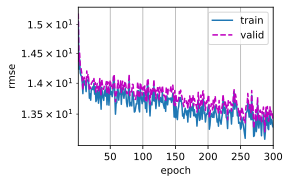

In [74]:
k, num_epochs, lr, weight_decay, batch_size = 5, 300, 5, 0, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}-折验证：平均训练log rmse: {float(train_l):f},'
      f'平均验证log rmse: {float(valid_l):f}')

8几个数字 1000


### 请注意，有时⼀组超参数的训练误差可能⾮常低，但K折交叉验证的误差要⾼得多，这表明模型过拟合了。在整个训练过程中，我们希望监控训练误差和验证误差这两个数字。较少的过拟合可能表明现有数据可以⽀撑⼀个更强⼤的模型，较⼤的过拟合可能意味着我们可以通过正则化技术来获益。

### 提交Kaagle预测

In [1]:
# 既然我们知道应该选择什么样的超参数，我们不妨使⽤所有数据对其进⾏训练（⽽不是仅使⽤交叉验证中使
# ⽤的1 − 1/K的数据）。然后，我们通过这种⽅式获得的模型可以应⽤于测试集。将预测保存在CSV⽂件中可
# 以简化将结果上传到Kaggle的过程。

In [21]:
def train_and_pred(train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
             ylabel='log rmse', xlim=[1, num_epochs], yscale='log')
    print(f'训练log rmse: {float(train_ls[-1]):f}')
    # 将网络应用于测试集。
    preds = net(test_features).detach().numpy()
    # 将其重新格式化以导出到Kaagle
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('submission.csv', index=False)

训练log rmse: 0.162243


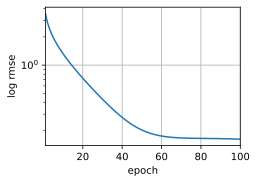

In [22]:
train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)